# <font color='black'> Time-Wasters on Social Media</font>

#### <font color='black'>presenter Name: </font> Osherel Tasama.
###### source : https://www.kaggle.com/datasets/muhammadroshaanriaz/time-wasters-on-social-media/data

In [1]:
from IPython.display import Image, display
display(Image(url='https://img.ice.co.il/giflib/news/rsPhoto/sz_204/rsz_615_346_social_media_870.jpg', width=800))

## Analysis of Social Media Usage Patterns:

The goal of this project is to analyze social media usage patterns to understand how the time spent on these platforms affects users' productivity, satisfaction, and personal lives.
Using the "Time-Wasters on Social Media" dataset, we will examine how users interact with different social media platforms and the impact of these usage patterns on their personal and professional lives.
Throughout the project, we will create various visualizations to illustrate our findings, explore relationships between different variables, and present practical insights and recommendations for users to manage their time more efficiently and reduce time wastage. Additionally, we will provide recommendations for app developers to improve their products from a business perspective, aiming to increase engagement while reducing negative impacts on users.

#### Importing Libraries for Data Analysis and Visualization:

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

#### Loading and Previewing the Dataset:

In [3]:
file_path = 'C:\\Users\\oshri\\OneDrive\\שולחן העבודה\\פרוייקט\\Time-Wasters on Social Media.csv'
df = pd.read_csv(file_path)
df.head()

,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,ProductivityLoss,Satisfaction,Watch Reason,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType
0,1,56,Male,Pakistan,82812,True,True,Engineer,Rural,Instagram,...,3,7,Procrastination,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
1,2,46,Female,Mexico,27999,False,True,Artist,Urban,Instagram,...,5,5,Habit,Computer,Android,5:00 PM,7,3,At school,Wi-Fi
2,3,32,Female,United States,42436,False,True,Engineer,Rural,Facebook,...,6,4,Entertainment,Tablet,Android,2:00 PM,8,2,At home,Mobile Data
3,4,60,Male,Barzil,62963,True,False,Waiting staff,Rural,YouTube,...,3,7,Habit,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data
4,5,25,Male,Pakistan,22096,False,True,Manager,Urban,TikTok,...,8,2,Boredom,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data


#### column names:

In [4]:
print(list(df.columns))

['UserID', 'Age', 'Gender', 'Location', 'Income', 'Debt', 'Owns Property', 'Profession', 'Demographics', 'Platform', 'Total Time Spent', 'Number of Sessions', 'Video ID', 'Video Category', 'Video Length', 'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched', 'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Watch Reason', 'DeviceType', 'OS', 'Watch Time', 'Self Control', 'Addiction Level', 'CurrentActivity', 'ConnectionType']


#### Length of the data:

In [5]:
len(df)

1000

#### Checking for missing values:

In [6]:
df.isnull().sum().sort_values(ascending=False)

UserID                      0
Age                         0
Gender                      0
Location                    0
Income                      0
Debt                        0
Owns Property               0
Profession                  0
Demographics                0
Platform                    0
Total Time Spent            0
Number of Sessions          0
Video ID                    0
Video Category              0
Video Length                0
Engagement                  0
Importance Score            0
Time Spent On Video         0
Number of Videos Watched    0
Scroll Rate                 0
Frequency                   0
ProductivityLoss            0
Satisfaction                0
Watch Reason                0
DeviceType                  0
OS                          0
Watch Time                  0
Self Control                0
Addiction Level             0
CurrentActivity             0
ConnectionType              0
dtype: int64

#### There are no missing values

#### Checking for data types:

In [7]:
df.dtypes

UserID                       int64
Age                          int64
Gender                      object
Location                    object
Income                       int64
Debt                          bool
Owns Property                 bool
Profession                  object
Demographics                object
Platform                    object
Total Time Spent             int64
Number of Sessions           int64
Video ID                     int64
Video Category              object
Video Length                 int64
Engagement                   int64
Importance Score             int64
Time Spent On Video          int64
Number of Videos Watched     int64
Scroll Rate                  int64
Frequency                   object
ProductivityLoss             int64
Satisfaction                 int64
Watch Reason                object
DeviceType                  object
OS                          object
Watch Time                  object
Self Control                 int64
Addiction Level     

## Age Analysis:

In [8]:
min_age = df['Age'].min()
max_age = df['Age'].max()
summary_df = pd.DataFrame({
    'Age': ['Minimum ', 'Maximum '],
    'Value': [min_age, max_age]})
summary_df

,Age,Value
0,Minimum,18
1,Maximum,64


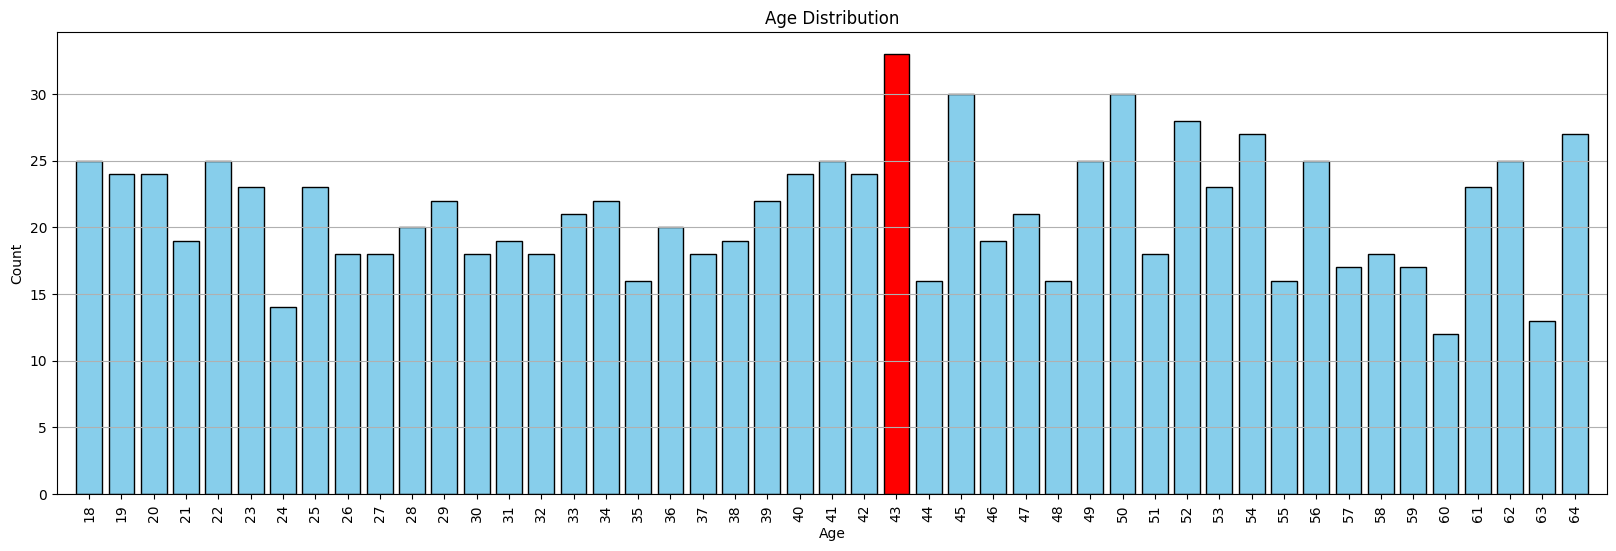

In [9]:
age_counts = df['Age'].value_counts().sort_index()
colors = ['red' if count == max(age_counts.values) else 'skyblue' for count in age_counts.values]
plt.figure(figsize=(20, 6))
plt.bar(age_counts.index, age_counts.values, color=colors, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(age_counts.index, rotation=90)
plt.xlim(left=min(age_counts.index)-1, right=max(age_counts.index)+1)
plt.grid(axis='y')
plt.show()

#### The graph shows that, surprisingly, the most common age in our data is 43.

#### Distribution of Ages in Different Age Ranges :

In [10]:
bins = [18, 25, 35, 45, 55, 64]
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']
df['Age Range'] = pd.cut(df['Age'], bins=bins, right=True, include_lowest=True, labels=labels)
pivot_table = df.pivot_table(index='Age Range', aggfunc='size', observed=True).reset_index()
pivot_table.columns = ['Age Range', 'Count']
pivot_table

,Age Range,Count
0,18-25,177
1,26-35,192
2,36-45,231
3,46-55,223
4,56-64,177


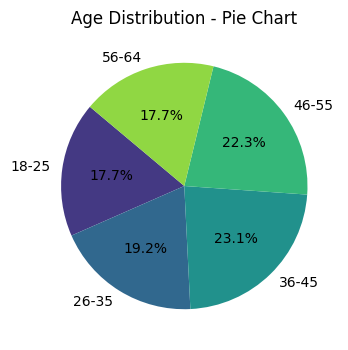

In [11]:
bins = [18, 25, 35, 45, 55, 64]
labels = ['18-25', '26-35', '36-45', '46-55', '56-64']
age_ranges = pd.cut(df['Age'], bins=bins, right=True, include_lowest=True, labels=labels)
age_distribution = df.groupby(age_ranges, observed=False).size()
plt.figure(figsize=(4, 4))
plt.pie(age_distribution, labels=age_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(age_distribution)), startangle=140)
plt.title('Age Distribution - Pie Chart')
plt.show()

#### Checking the type of platforms:

In [37]:
unique_platforms = df['Platform'].unique()
print(unique_platforms)

['Instagram' 'Facebook' 'YouTube' 'TikTok']


#### Unexpected Age Distribution in Social Media Usage: Analysis and Possible Explanations:

Based on the platforms represented in the data, one might expect that the overall distribution of social media users by age would look like this:

the youngest group (18-25) would constitute the largest portion, with about 30% of the total usage, as this demographic tends to prefer new and engaging content that matches their interests. The 26-35 age group would contribute a significant 25% of the usage, representing a more mature audience that remains active across various platforms. The 36-45 age group would account for around 20% of the total usage, with a notable presence on platforms offering diverse and relevant content for these ages. The 46-55 age group would represent about 15% of the usage, while those aged 56-64 would contribute approximately 10% of the total usage, with a tendency to use platforms that provide useful and engaging content.

However, the actual results presented in the graph are surprising: users in the 18-25 age group are the smallest, while the 46-55 and 36-45 age groups show higher numbers. This unexpected distribution can be attributed to several factors:
    
First, there may be a sampling bias: if the sample does not accurately represent the general population and is skewed towards age groups with more prevalent older users, this could explain the unusual age distribution. Second, there could be differences in social media usage patterns among various age groups, with older groups potentially using social media more intensively. Additionally, cultural or economic changes might affect social media usage by age, as well as technological trends that could shift usage patterns over time. Further investigation will explore whether there are demographic or economic factors influencing these findings.

## Location Analysis:

Analysis By Location and Platform:

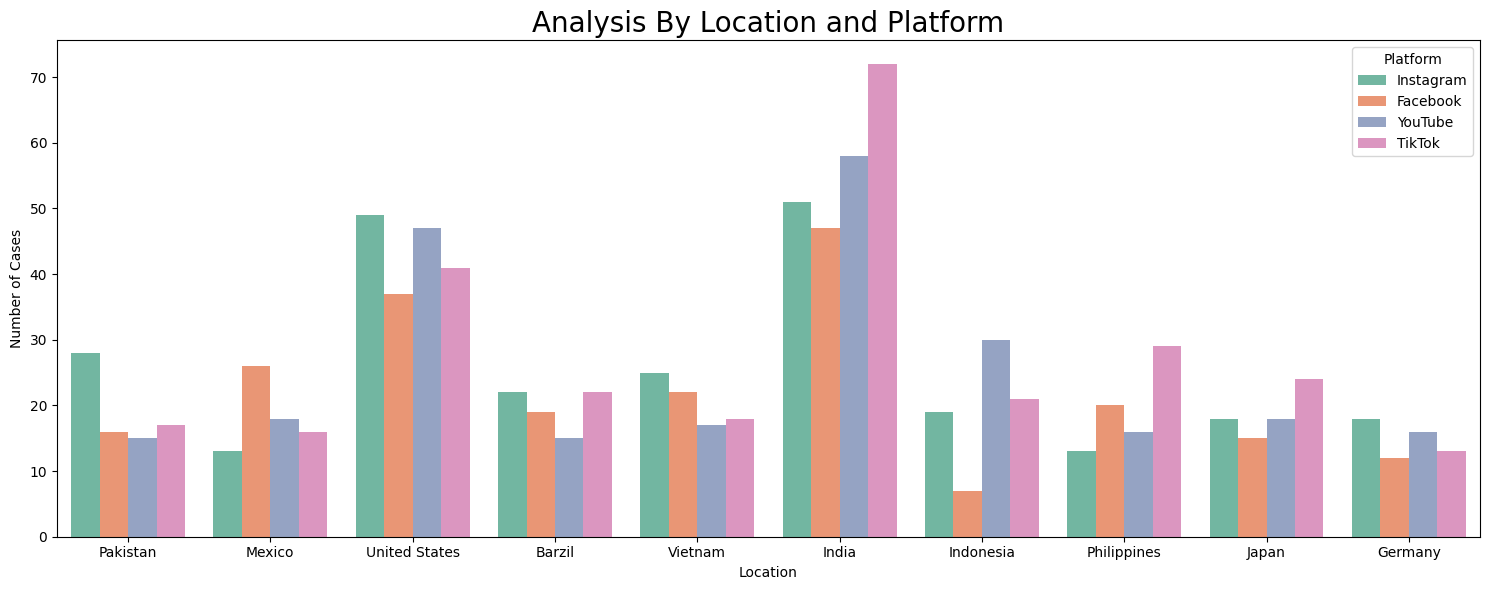

In [13]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(data=df, x='Location', hue='Platform', palette='Set2')
ax.set_title('Analysis By Location and Platform', size=20)
ax.set_xlabel('Location')
ax.set_ylabel('Number of Cases')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Relationship Between User Quantity and Satisfaction Levels Across Different Countries-Analysis:

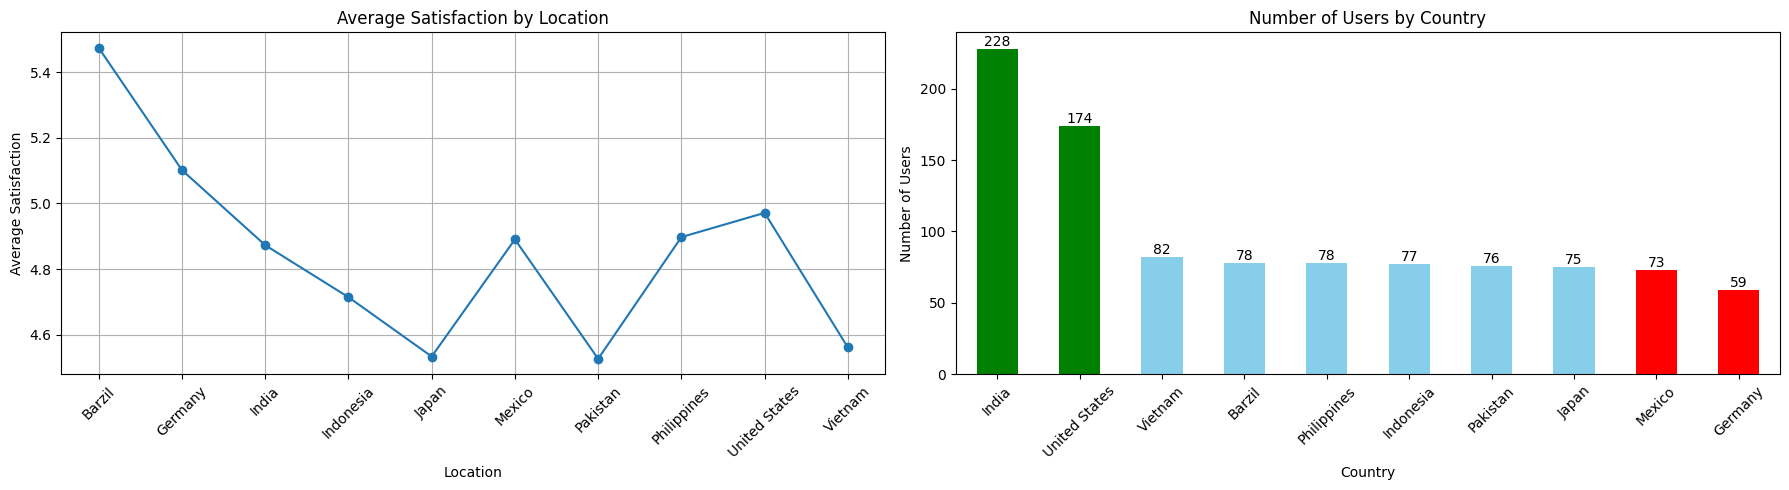

In [58]:
user_counts = df['Location'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(18, 5))
mean_satisfaction = df.groupby('Location')['Satisfaction'].mean().sort_index()
axs[0].plot(mean_satisfaction.index, mean_satisfaction.values, marker='o')
axs[0].set_title('Average Satisfaction by Location')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Average Satisfaction')
axs[0].grid(True)
axs[0].set_xticks(range(len(mean_satisfaction.index)))
axs[0].set_xticklabels(mean_satisfaction.index, rotation=45)
colors = ['skyblue'] * len(user_counts)
top_two = user_counts.nlargest(2).index
bottom_two = user_counts.nsmallest(2).index
for idx in user_counts.index:
    if idx in top_two:
        colors[user_counts.index.get_loc(idx)] = 'green'
    if idx in bottom_two:
        colors[user_counts.index.get_loc(idx)] = 'red'
user_counts.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Number of Users by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of Users')
axs[1].set_xticklabels(user_counts.index, rotation=45)
for patch in axs[1].patches:
    height = patch.get_height()
    axs[1].text(patch.get_x() + patch.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

#### Insights:

Based on the analysis of satisfaction levels in different countries, the highest satisfaction was observed in Brazil and Germany, which have a very low number of users. In contrast, India has a relatively low level of satisfaction despite having the highest number of users.

This can be explained by the fact that as the number of users increases, user satisfaction with the content consumed may decrease. In countries with a very high number of users, service and support may struggle to keep up with the increase in the number of users, leading to strain on support systems, longer response times and less personal attention. Scaling-related issues, such as less smooth experiences or content errors, can occur, negatively impacting satisfaction. Additionally, in countries with a lower number of users, the company may offer more personalized and professional services, while in countries with a higher number of users, the focus may shift to general maintenance rather than personalized innovation, which may affect satisfaction. Therefore, it is expected that with an increase in the number of users, there may be a decrease in satisfaction.

#### correlation between engagement by location and satisfaction: 

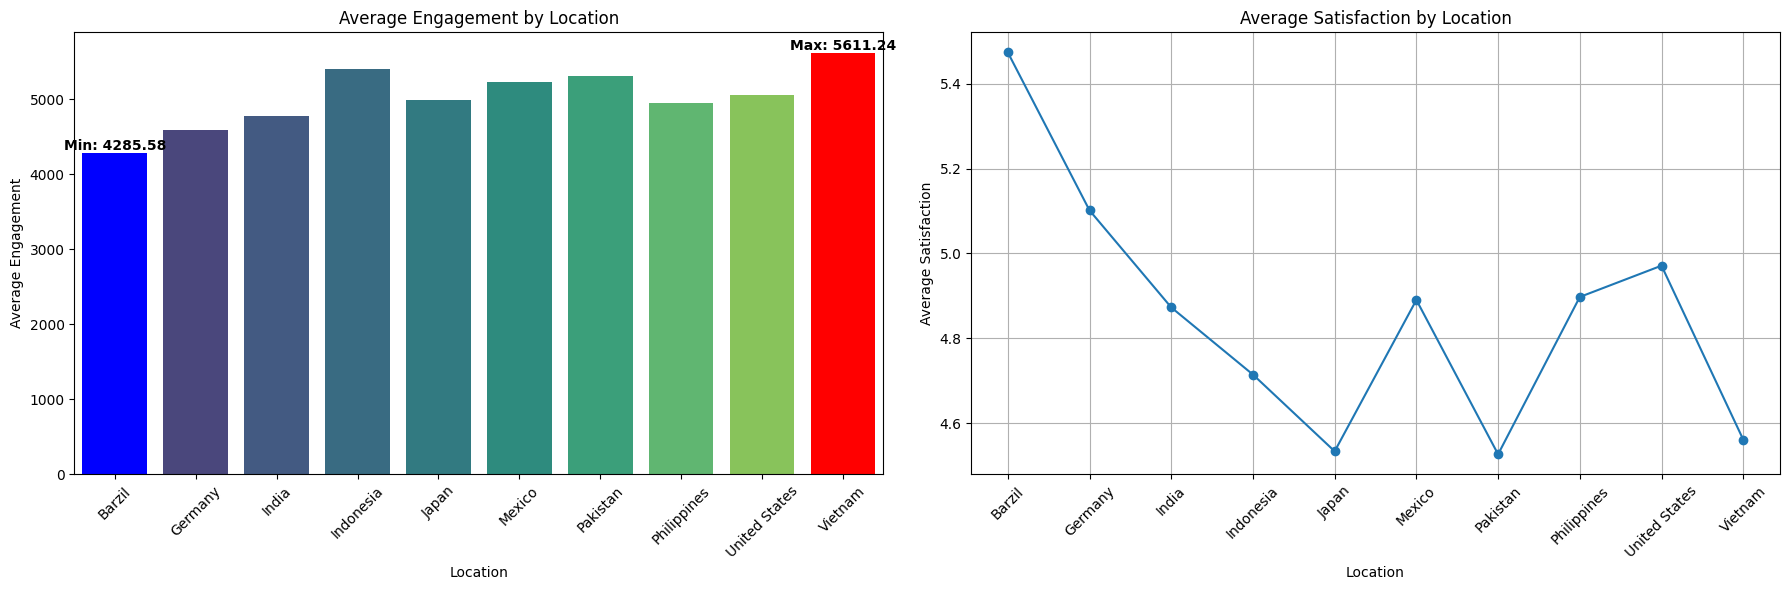

In [60]:
average_engagement_by_location = df.groupby('Location')['Engagement'].mean().reset_index()
average_engagement_by_location.columns = ['Location', 'Average Engagement']
mean_satisfaction = df.groupby('Location')['Satisfaction'].mean().sort_index()
plt.figure(figsize=(18, 6))  # להגדיר גובה מתאים
plt.subplot(1, 2, 1)
bars = sns.barplot(data=average_engagement_by_location, x='Location', y='Average Engagement', hue='Location', dodge=False, palette='viridis', legend=False)
plt.title('Average Engagement by Location')
plt.xlabel('Location')
plt.ylabel('Average Engagement')
plt.xticks(rotation=45)
max_value = average_engagement_by_location['Average Engagement'].max()
min_value = average_engagement_by_location['Average Engagement'].min()
max_location = average_engagement_by_location[average_engagement_by_location['Average Engagement'] == max_value]['Location'].values[0]
min_location = average_engagement_by_location[average_engagement_by_location['Average Engagement'] == min_value]['Location'].values[0]
for i, bar in enumerate(bars.patches):
    location_label = average_engagement_by_location.iloc[i]['Location']
    height = bar.get_height()
    if location_label == max_location:
        bar.set_facecolor('red')
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'Max: {max_value:.2f}', ha='center', va='bottom', color='black', weight='bold')
    elif location_label == min_location:
        bar.set_facecolor('blue')
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'Min: {min_value:.2f}', ha='center', va='bottom', color='black', weight='bold')
plt.subplot(1, 2, 2)
plt.plot(mean_satisfaction.index, mean_satisfaction.values, marker='o')
plt.title('Average Satisfaction by Location')
plt.xlabel('Location')
plt.ylabel('Average Satisfaction')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the data, it can be observed that Brazil has the lowest engagement level with the video, while Vietnam has the highest. Engagement refers to the level of interaction users have with the video, such as likes, comments, and shares. The low engagement value in Brazil indicates that users in this country perform fewer interactive actions with the video compared to users in other countries, whereas users in Vietnam perform more.

Initially, we hypothesized that engagement with the content (such as likes and comments) would be higher in countries with higher satisfaction levels, as users who are more satisfied with the content are expected to show more engagement.This hypothesis is based on the assumption that satisfied users tend to invest more in platforms where they feel content. However, surprisingly, we found that Brazil, despite having the highest satisfaction level, exhibits the lowest engagement level. Additionally, Vietnam, despite having very low satisfaction, shows the highest engagement level.This suggests that there may be other factors influencing engagement levels beyond just satisfaction with the content.

#### The gap between satisfaction levels and engagement levels across countries can be explained by several possible factors:

1.Content Consumption Patterns: In Brazil, users might be satisfied but less engaged in interactive actions like likes and comments, while in Vietnam, users show high engagement despite low satisfaction.

2.Cultural Differences: Different cultures interact with content in various ways. In Vietnam, a higher culture of sharing and interaction might exist, even if satisfaction levels are lower.

3.Platform Behavior: Behavior on digital platforms can vary by country. In Vietnam, the platform might encourage more interaction, whereas in Brazil, the platform or content may not foster as much interaction.

4.Content Type and Relevance: The type of content and its relevance to users might affect engagement. If content in Vietnam is more appealing or relevant, it could lead to higher interaction levels.

5.Demographics and Technology Access: Differences in demographics, such as age and socio-economic status, as well as access to technology, may impact user behavior.

6.Economic and Social Factors: Economic and social factors can influence how users interact with content. In countries with economic constraints, users might focus more on consuming content without engaging interactively.

7.Platform Design and Features: The design and features of the platform itself might affect the types of interactions emphasized in different countries.

8.Content Distribution and Promotion: How content is promoted and distributed can impact engagement. If content is widely promoted and accessible in Vietnam, it might lead to higher interaction levels.


#### Total time the user has spent on the platform relative to location:

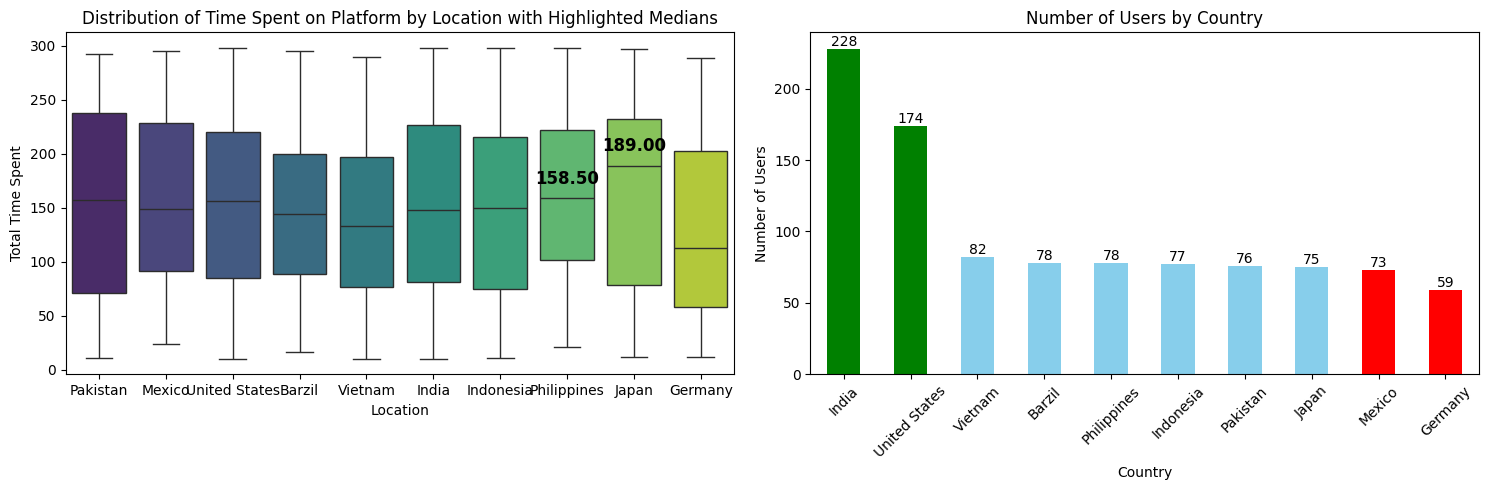

In [15]:
user_counts = df['Location'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
ax = sns.boxplot(data=df, x='Location', y='Total Time Spent', hue='Location', palette='viridis', dodge=False, legend=False, ax=axs[0])
medians = df.groupby('Location')['Total Time Spent'].median()
top_two_locations = medians.nlargest(2).index
for i, location in enumerate(df['Location'].unique()):
    if location in top_two_locations:
        for patch in ax.artists:
            if patch.get_x() == i:
                patch.set_facecolor('red')   
        axs[0].text(i, medians[location] + 10, f'{medians[location]:.2f}', ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')
axs[0].set_title('Distribution of Time Spent on Platform by Location with Highlighted Medians')
axs[0].set_xlabel('Location')
axs[0].set_ylabel('Total Time Spent')
axs[0].set_xticks(range(len(df['Location'].unique())))
axs[0].set_xticklabels(df['Location'].unique(), rotation=0)

colors = ['skyblue'] * len(user_counts)
top_two = user_counts.nlargest(2).index
bottom_two = user_counts.nsmallest(2).index
for idx in user_counts.index:
    if idx in top_two:
        colors[user_counts.index.get_loc(idx)] = 'green'
    if idx in bottom_two:
        colors[user_counts.index.get_loc(idx)] = 'red'
user_counts.plot(kind='bar', color=colors, ax=axs[1])
axs[1].set_title('Number of Users by Country')
axs[1].set_xlabel('Country')
axs[1].set_ylabel('Number of Users')
axs[1].set_xticklabels(user_counts.index, rotation=45)
for patch in axs[1].patches:
    height = patch.get_height()
    axs[1].text(patch.get_x() + patch.get_width() / 2, height, f'{height}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

The discrepancy between the high median of time spent on the platform in Japan and the Philippines and the lower number of users in these countries can be explained in several ways. It is possible that in these countries, a small number of users spend a significant amount of time on the platform, leading to a high median despite the overall low number of users. This suggests that the most active users in these countries are spending a lot of time on the platform, but they do not represent the majority of the population. Additionally, cultural differences and personal preferences could impact usage times. The platform might be more popular among certain groups within these countries but not among the general population. Market differences or data collection issues could also explain the discrepancy. A deeper analysis of usage distribution among users, along with an understanding of cultural and socioeconomic factors, could help clarify these gaps and provide a more comprehensive view of the market and user behavior.

## Debt Anlysis:

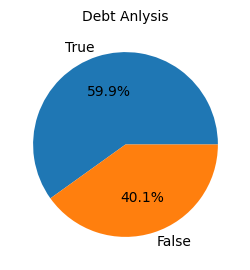

In [74]:
Debt = df[df["Debt"] != "Unknown"]
plt.figure(1, figsize=(3,3))
plt.title("Debt Anlysis", size = 10)
Debt['Debt'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

#### Relationship Between User Income and Debt:

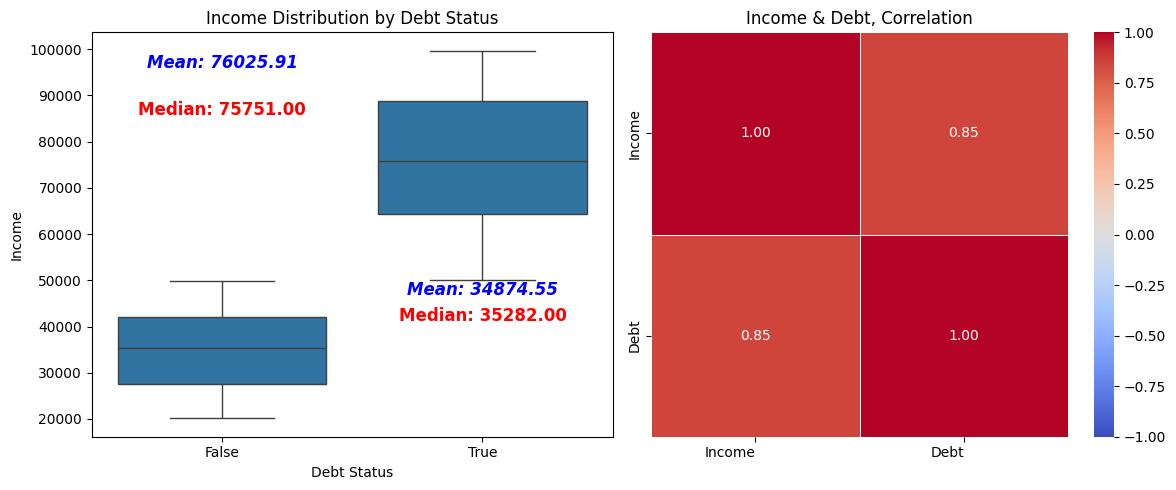

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
box_plot = sns.boxplot(x='Debt', y='Income', data=df, ax=axs[0])
for i, group in enumerate(df['Debt'].unique()):
    group_data = df[df['Debt'] == group]['Income']
    median = group_data.median()
    mean = group_data.mean()
    data_range = group_data.max() - group_data.min()  
    axs[0].text(i, median + 0.2 * data_range, f'Median: {median:.2f}', 
                horizontalalignment='center', color='red', weight='bold', fontsize=12)
    axs[0].text(i, mean + 0.4 * data_range, f'Mean: {mean:.2f}', 
                horizontalalignment='center', color='blue', weight='bold', fontsize=12, style='italic')
axs[0].set_title('Income Distribution by Debt Status')
axs[0].set_xlabel('Debt Status')
axs[0].set_ylabel('Income')
relevant_columns = ['Income', 'Debt']
df_relevant = df[relevant_columns]
df_relevant_encoded = pd.get_dummies(df_relevant, drop_first=True)
correlation_matrix = df_relevant_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1, ax=axs[1])
axs[1].set_title('Income & Debt, Correlation')
axs[1].set_xticklabels(correlation_matrix.columns, rotation=0, ha='right')
plt.tight_layout()
plt.show()

To our surprise, individuals with higher income tend to have a higher likelihood of debt compared to those with lower income. Those with higher income may feel a certain social pressure to maintain an appearance of success through high spending, often influenced by social media showcasing a luxurious lifestyle. Additionally, social media can drive further spending through targeted advertising, which may lead to debt. Moreover, extensive engagement with social media may distract from financial management and encourage unnecessary expenditures.

## Platform Anlysis

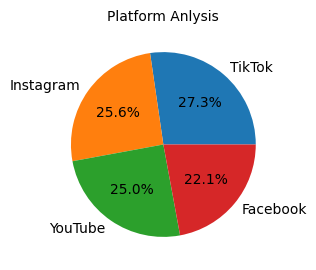

In [75]:
Platform = df[df["Platform"] != "Unknown"]
plt.figure(1, figsize=(3,3))
plt.title("Platform Anlysis", size = 10)
Platform['Platform'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

#### Based on the analysis of the relationships with the 'Platform' column, i chose to focus on three key columns that provide valuable insights for app developers:

1.Total Time Spent: This relationship can reveal how much time users spend on each platform, shedding light on the platform’s attractiveness and its impact on user behavior.

2.Satisfaction: This metric provides insight into how users feel about the app on each platform. If there is a significant difference in satisfaction between platforms, it may indicate issues with the service or user experience on one of the platforms.

3.Addiction Level: The connection between addiction level and the platform may indicate how users feel about the impact of the platform on their lives and how this affects their time spent and engagement.

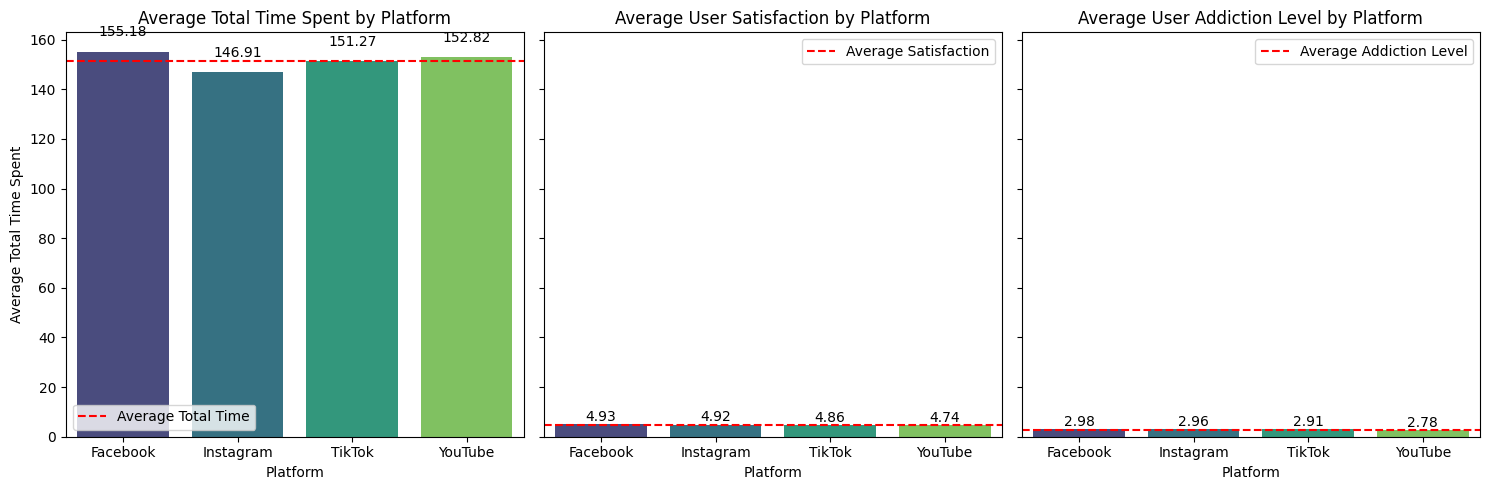

In [19]:
average_time = df.groupby('Platform')['Total Time Spent'].mean().reset_index()
satisfaction_by_platform = df.groupby('Platform')['Satisfaction'].mean().reset_index()
Addiction_Level_by_platform = df.groupby('Platform')['Addiction Level'].mean().reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.barplot(x='Platform', y='Total Time Spent', data=average_time, hue='Platform', palette='viridis', ax=axes[0], errorbar=None)
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Average Total Time Spent')
axes[0].set_title('Average Total Time Spent by Platform')
for index, row in average_time.iterrows():
    axes[0].text(index, row['Total Time Spent'] + 5, 
                 f'{row["Total Time Spent"]:.2f}', 
                 ha='center', va='bottom', fontsize=10)
axes[0].tick_params(axis='x', rotation=0)
average_total_time = average_time['Total Time Spent'].mean()  # Compute the mean of total time spent
axes[0].axhline(y=average_total_time, color='r', linestyle='--', linewidth=1.5, label='Average Total Time')
axes[0].legend()
sns.barplot(x='Platform', y='Satisfaction', data=satisfaction_by_platform, hue='Platform', palette='viridis', ax=axes[1])
for index, row in satisfaction_by_platform.iterrows():
    axes[1].text(index, row['Satisfaction'] + 0.05,  # Position text slightly above the bar
                 f'{row["Satisfaction"]:.2f}',  # Format the text to 2 decimal places
                 ha='center', va='bottom', fontsize=10)
axes[1].set_title('Average User Satisfaction by Platform')
axes[1].set_xlabel('Platform')
axes[1].set_ylabel('Average Satisfaction')
axes[1].tick_params(axis='x', rotation=0)
average_satisfaction = satisfaction_by_platform['Satisfaction'].mean()  # Compute the mean of satisfaction
axes[1].axhline(y=average_satisfaction, color='r', linestyle='--', linewidth=1.5, label='Average Satisfaction')
axes[1].legend()
sns.barplot(x='Platform', y='Addiction Level', data=Addiction_Level_by_platform, hue='Platform', palette='viridis', ax=axes[2])
for index, row in Addiction_Level_by_platform.iterrows():
    axes[2].text(index, row['Addiction Level'] + 0.05,  # Position text slightly above the bar
                 f'{row["Addiction Level"]:.2f}',  # Format the text to 2 decimal places
                 ha='center', va='bottom', fontsize=10)
axes[2].set_title('Average User Addiction Level by Platform')
axes[2].set_xlabel('Platform')
axes[2].set_ylabel('Average Addiction Level')
axes[2].tick_params(axis='x', rotation=0)
average_addiction_level = Addiction_Level_by_platform['Addiction Level'].mean()  # Compute the mean of addiction level
axes[2].axhline(y=average_addiction_level, color='r', linestyle='--', linewidth=1.5, label='Average Addiction Level')
axes[2].legend()
plt.tight_layout()
plt.show()

Total Time Spent: There is no significant difference in the average total time users spend on the app across different platforms.

User Satisfaction: There is no significant difference in user satisfaction levels across different platforms.

Addiction Level: There is no significant difference in the average addiction levels of users across different platforms.

#### Observation-for understanding the connection between the data:

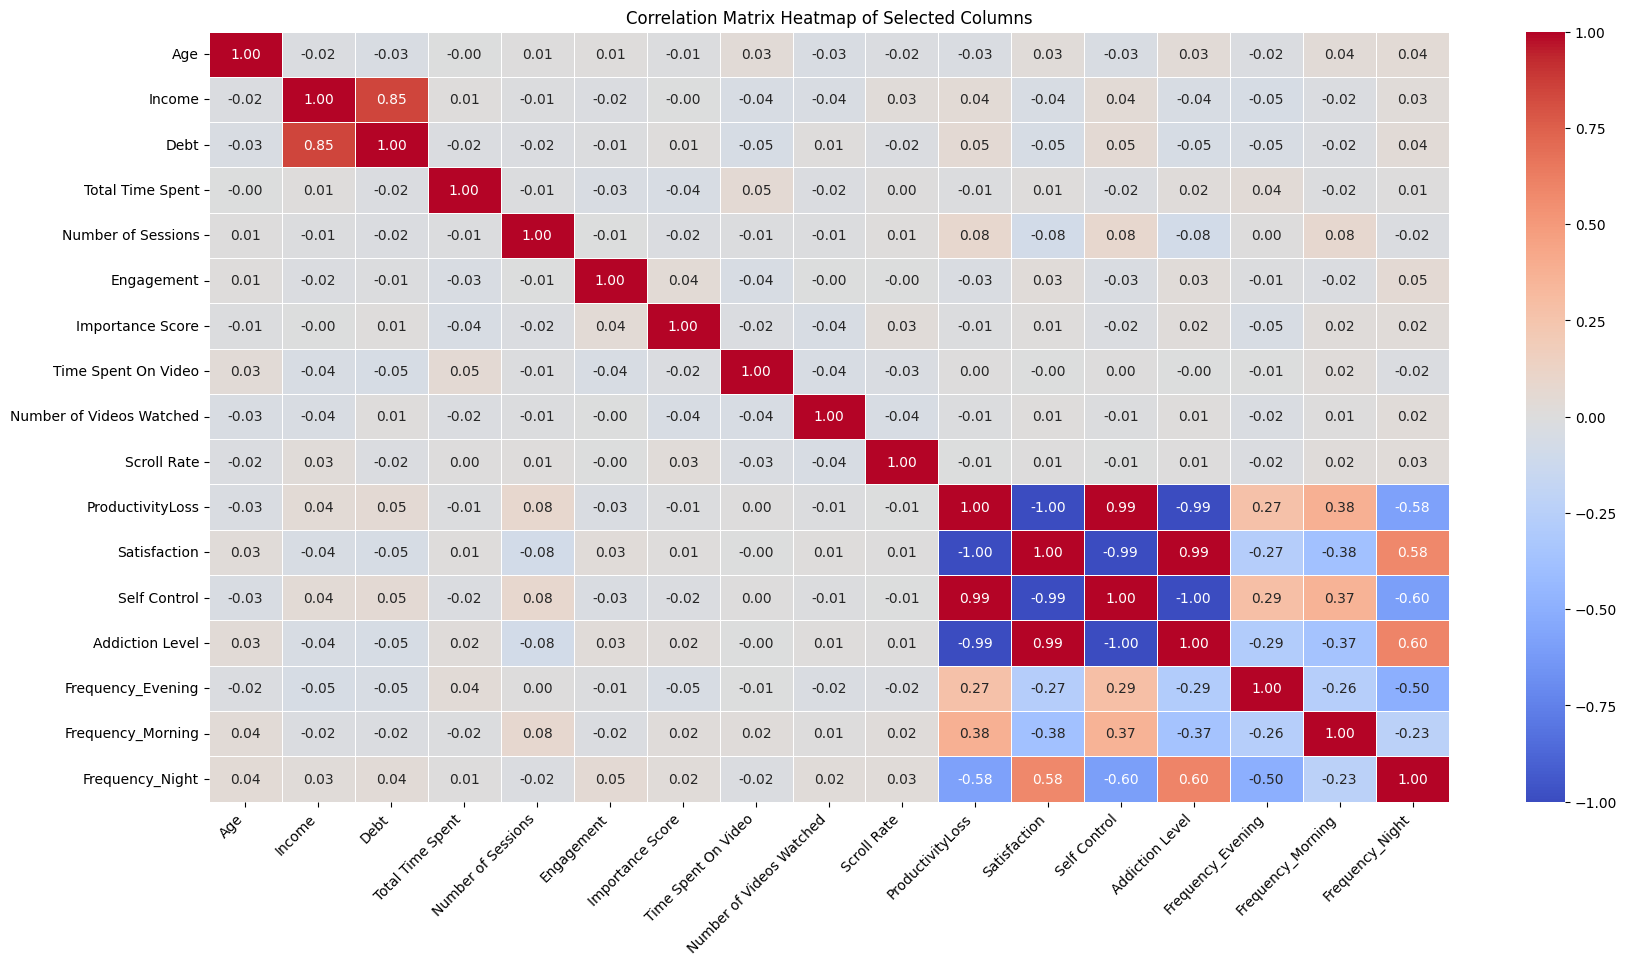

In [20]:
relevant_columns = [
    'Age', 'Income', 'Debt', 'Total Time Spent', 'Number of Sessions',
    'Engagement', 'Importance Score', 'Time Spent On Video', 'Number of Videos Watched',
    'Scroll Rate', 'Frequency', 'ProductivityLoss', 'Satisfaction', 'Self Control', 'Addiction Level'
]
df_relevant = df[relevant_columns]

df_relevant_encoded = pd.get_dummies(df_relevant, drop_first=True)

correlation_matrix = df_relevant_encoded.corr()

plt.figure(figsize=(20,10))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.xticks(rotation=45, ha='right') 

plt.title('Correlation Matrix Heatmap of Selected Columns')
plt.show()

## 1.Productivity Loss & Satisfaction:

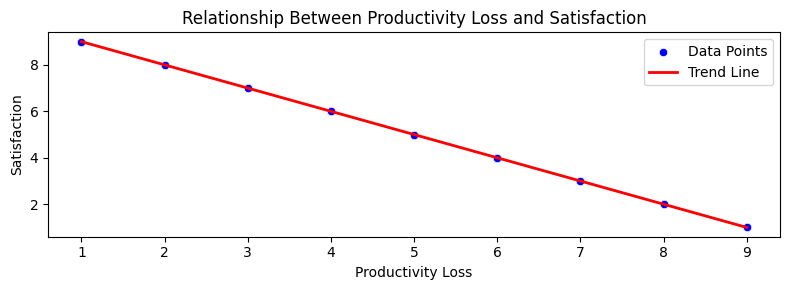

In [29]:
plt.figure(figsize=(8, 3))
sns.scatterplot(x='ProductivityLoss', y='Satisfaction', data=df, color='blue', label='Data Points')
sns.lineplot(x='ProductivityLoss', y='Satisfaction', data=df, color='red', linestyle='-', linewidth=2, label='Trend Line')
plt.title('Relationship Between Productivity Loss and Satisfaction', size=12)
plt.xlabel('Productivity Loss')
plt.ylabel('Satisfaction')
plt.legend()
plt.tight_layout()
plt.show()

A strong negative correlation between "Productivity Loss" and "Satisfaction" suggests that as productivity loss increases, satisfaction tends to decrease, and vice versa. This relationship is intuitive because productivity loss often signifies inefficiencies, disruptions, or failures in a work or operational environment. When productivity suffers, it typically leads to frustration, stress, and dissatisfaction among employees or stakeholders, as they face obstacles and setbacks that impede their ability to achieve goals effectively. Conversely, high satisfaction levels usually reflect a smoother, more efficient, and successful operational environment, where productivity is maintained or enhanced. Therefore, the negative correlation aligns with the expectation that greater productivity losses undermine satisfaction, while higher satisfaction is associated with lower productivity losses.

## 2.ProductivityLoss& Self Control:

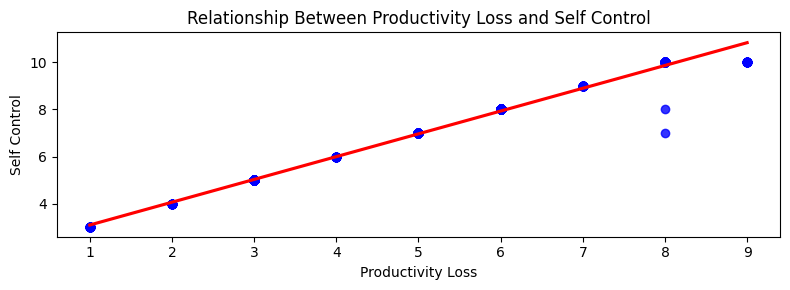

In [34]:
plt.figure(figsize=(8, 3))
sns.regplot(x='ProductivityLoss', y='Self Control', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Productivity Loss and Self Control', size=12)
plt.xlabel('Productivity Loss')
plt.ylabel('Self Control')
plt.tight_layout()
plt.show()

The strong positive correlation between self-control and productivity loss may seem counterintuitive, but there are possible explanations. Individuals with high self-control often have very high expectations and are meticulous about time management and efficiency. When they find themselves spending a lot of time on social media, they may experience increased frustration, as the sensation of losing control can be more pronounced for them. The sense of disappointment from falling short of their personal standards can lead to a greater feeling of productivity loss. In other words, while high self-control leads to greater awareness of productivity loss, the feeling of ineffectiveness in such situations may be more acute compared to individuals with lower levels of self-control.

## 3.Addiction Level & ProductivityLoss: 

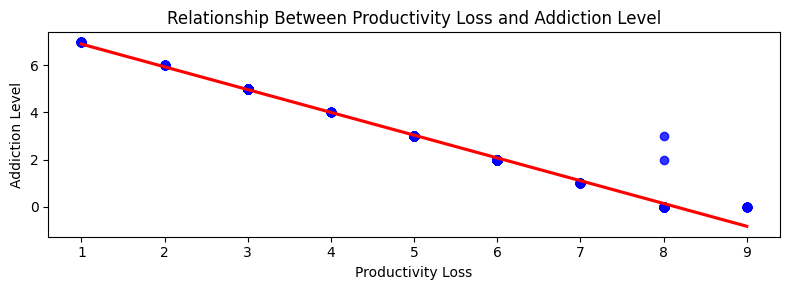

In [76]:
plt.figure(figsize=(8, 3))
sns.regplot(x='ProductivityLoss', y='Addiction Level', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between Productivity Loss and Addiction Level', size=12)
plt.xlabel('Productivity Loss')
plt.ylabel('Addiction Level')
plt.tight_layout()
plt.show()

A strong negative correlation between productivity loss and addiction level is logical because higher addiction levels can lead to increased time spent on addictive behaviors or substances, which often results in decreased focus and efficiency in work or productive activities. As addiction levels rise, individuals may experience reduced cognitive function, lack of motivation, and time management issues, all of which contribute to greater productivity loss. Essentially, the more severe the addiction, the greater the negative impact on one's ability to maintain productivity.

#### Relationship between the loss of productivity and the viewing time - the specific time of day when the user watched the video:

In [38]:
unique_Frequency = df['Frequency'].unique()
print(unique_Frequency)

['Night' 'Afternoon' 'Evening' 'Morning']


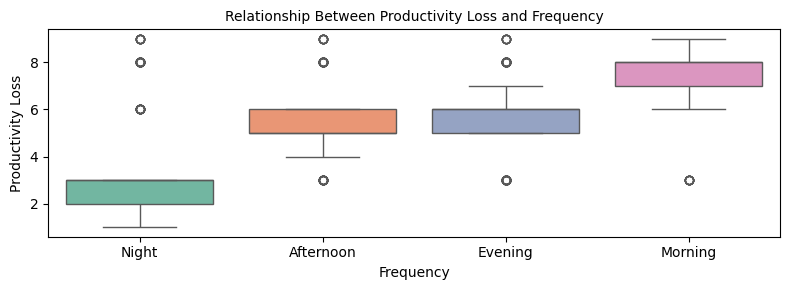

In [77]:
plt.figure(figsize=(8, 3))
sns.boxplot(x='Frequency', y='ProductivityLoss', data=df, hue='Frequency', palette='Set2')
plt.title('Relationship Between Productivity Loss and Frequency', size=10)
plt.xlabel('Frequency')
plt.ylabel('Productivity Loss')
plt.tight_layout()
plt.show()

<p style="font-size: 12px;">
It can be seen that the category with the lowest productivity loss is the nighttime category. This is followed by the afternoon and evening categories, which have similar but slightly higher productivity loss compared to the nighttime . The category with the highest productivity loss is the morning.

<p style="font-size: 12px;">
Based on the findings from the graph, here are some <strong>possible hypotheses explaining why</strong> productivity loss varies by social media usage times:
    
<p style="font-size: 12px;">
<strong>Morning Use:</strong> Starting the day with social media may lead to higher productivity loss as users are drawn to virtual content and lose valuable time.
    
<p style="font-size: 12px;">
<strong>Mental Functioning:</strong> In the morning, focusing on social media might lead to productivity loss, while in the evening, the impact of social media use is lower due to decreased focus ability.

<p style="font-size: 12px;">
<strong>Daily Habits:</strong> In the afternoon and evening, fatigue and stress might reduce the impact of social media use on productivity loss.

<p style="font-size: 12px;">
<strong>Sleep Quality:</strong> Social media use at night may disrupt sleep quality and affect performance the following day, but not necessarily the current day's productivity loss.

# Key Findings and Recommendations from Social Media Usage Analysis:

Based on the analysis presented, several key insights can be drawn, leading to actionable recommendations for both users and app developers.
### Recommendations for Users:

#### 1.Productive Time Management:
We discovered that users who start their day with social media tend to experience higher productivity loss. Therefore, it is advisable to begin the day with activities that enhance productivity and reserve social media usage for later hours.

#### 2.Content Interaction:
The discrepancy between satisfaction levels and interaction rates across different countries highlights that there is not always a direct link between content satisfaction and interactive actions like likes and comments. Users should explore and experiment with various platforms to find those that best suit their personal preferences and provide the most satisfactory experience.

In [72]:
from IPython.display import Image, display
display(Image(url='https://pic1.calcalist.co.il/PicServer3/2019/04/01/896045/13_l.jpg', width=600))

### Recommendations for App Developers:

#### 1.Enhancing Personalization:
The data analysis shows that user responses and needs vary across different countries and demographics. It is recommended to improve the app’s personalization features to better align with the preferences of diverse user groups, enhancing content recommendations and user experience.

#### 2.Customer Service:
In countries with a high number of users, satisfaction levels tend to be lower. Emphasis should be placed on improving customer service and professional support in high-user countries to prevent satisfaction decline and enhance the overall experience.

#### 3.Encouraging Interaction: 
While there is no significant difference in the total time spent on different platforms, interaction and satisfaction levels vary. Developers should focus on creating content and features that encourage higher interaction rates and understand cultural and economic factors affecting user behavior to improve engagement and satisfaction.

In [73]:
from IPython.display import Image, display
display(Image(url='https://www.alljobs.co.il/Uploads/Objects/FileUpload30_03_2022_12_02_22.jpg', width=600))

## Project Summary : 

This project analyzed social media usage patterns to understand their impact on users' productivity, satisfaction, and personal lives. We examined demographic influences, content interaction, and platform engagement. Key findings include the surprising distribution of social media users by age, variations in satisfaction and engagement across countries, and the relationship between productivity loss and self-control. Based on these insights, recommendations were provided for users to manage their social media time more effectively and for app developers to enhance personalization, customer service, and interaction features to improve user experience and engagement.

I hope I was able to provide valuable insights and practical recommendations! Personally, I thoroughly enjoyed working on this project. I gained extensive knowledge about social media usage patterns and their impact on users. I feel that my analytical and conclusion-drawing skills are continually improving, and I am always eager to learn new things and develop further.

I invite you to visit my:
#### GitHub profile:
https://github.com/Oshereltasama/Projects  to explore more of my projects. 
#### LinkedIn:
https://www.linkedin.com/in/oshri-tasama-2a755324b/.

If you have any questions or wish to discuss the project, feel free to contact me via
#### email:
oshritasama20@gmail.com 

# <font color='green'>Thank you!</font>